# **Importing Lib**

In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow
!pip install lime
!pip install category_encoders

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8271536708f3575014ce7c478f066229f463ab5de224a3ac284cb029f29b066c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
   ━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin
from lime.lime_tabular import LimeTabularExplainer
from sklearn.datasets import load_iris
import shap
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

# **Importing Dataset**

In [ ]:
Dataset=pd.read_csv('/content/new_dataset_3 (2).csv')

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   Hair Loss               400 non-null    object 
 2   Stay_up_late            400 non-null    int64  
 3   Pressure_level          400 non-null    object 
 4   Coffee_consumed         400 non-null    int64  
 5   Brain_working_duration  400 non-null    int64  
 6   School_assesssment      95 non-null     object 
 7   Stress                  400 non-null    object 
 8   Shampoo_brand           400 non-null    object 
 9   Swimming                400 non-null    object 
 10  Hair_washing            400 non-null    object 
 11  Hair_grease             396 non-null    float64
 12  Dandruff                111 non-null    object 
 13  Libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [ ]:
Dataset.isnull().sum()

,0
date,0
Hair Loss,0
Stay_up_late,0
Pressure_level,0
Coffee_consumed,0
Brain_working_duration,0
School_assesssment,305
Stress,0
Shampoo_brand,0
Swimming,0


# **Impution**

In [ ]:
# Get the mode of both columns
mode_values = Dataset[["School_assesssment", "Dandruff","Hair_grease"]].mode()

# Fill missing values with the mode for each column
Dataset["School_assesssment"].fillna(mode_values["School_assesssment"][0], inplace=True)
Dataset["Dandruff"].fillna(mode_values["Dandruff"][0], inplace=True)
Dataset["Hair_grease"].fillna(mode_values["Hair_grease"][0], inplace=True)

<ipython-input-6-c0797cf4ec97>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset["School_assesssment"].fillna(mode_values["School_assesssment"][0], inplace=True)
<ipython-input-6-c0797cf4ec97>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
Dataset.isnull().sum()

,0
date,0
Hair Loss,0
Stay_up_late,0
Pressure_level,0
Coffee_consumed,0
Brain_working_duration,0
School_assesssment,0
Stress,0
Shampoo_brand,0
Swimming,0


In [ ]:
# Get data types of all columns
data_types = Dataset.dtypes

# Separate categorical and numerical features
categorical_features = data_types[data_types == 'object'].index.tolist()
numerical_features = data_types[data_types != 'object'].index.tolist()

# Print the names of categorical and numerical features
print("Categorical feature names:", categorical_features)
print("Numerical feature names:", numerical_features)

Categorical feature names: ['date', 'Hair Loss', 'Pressure_level', 'School_assesssment', 'Stress', 'Shampoo_brand', 'Swimming', 'Hair_washing', 'Dandruff']
Numerical feature names: ['Stay_up_late', 'Coffee_consumed', 'Brain_working_duration', 'Hair_grease', 'Libido']


In [ ]:
Dataset['Hair Loss'].value_counts()

,count
Hair Loss,
Few,169
Medium,167
Many,42
A lot,22


In [ ]:
Dataset['Pressure_level'].value_counts()

,count
Pressure_level,
Low,275
Medium,57
High,45
Very High,23


In [ ]:
Dataset['School_assesssment'].value_counts()

,count
School_assesssment,
Team ass,344
Individual ass,24
Final exam revision,24
Final exam,8


In [ ]:
Dataset['Stress'].value_counts()

,count
Stress,
Low,261
Medium,56
High,45
Very High,38


In [ ]:
Dataset['Shampoo_brand'].value_counts()

,count
Shampoo_brand,
Hair & Shoulder,273
Pantene,127


In [ ]:
Dataset['Swimming'].value_counts()

,count
Swimming,
No,307
Yes,93


In [ ]:
Dataset['Hair_washing'].value_counts()

,count
Hair_washing,
N,209
Y,191


In [ ]:
Dataset['Dandruff'].value_counts()

,count
Dandruff,
Few,365
Many,35


In [ ]:
Dataset.replace({"Swimming":{"No":0,"Yes":1},"Hair_washing":{"N":0,"Y":1},"Dandruff":{"Few":0,"Many":1}, "Hair Loss": {"Few": 0, "Medium": 1, "Many": 1, "A lot": 1},},inplace=True)

<ipython-input-17-1afc0c8c63c6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataset.replace({"Swimming":{"No":0,"Yes":1},"Hair_washing":{"N":0,"Y":1},"Dandruff":{"Few":0,"Many":1}, "Hair Loss": {"Few": 0, "Medium": 1, "Many": 1, "A lot": 1},},inplace=True)


In [ ]:
Dataset['Hair Loss'].value_counts()

,count
Hair Loss,
1,231
0,169


In [ ]:
# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset['Shampoo_brand'] = encoder.fit_transform(
    Dataset['Shampoo_brand'],
    Dataset['Hair Loss'] # Corrected column name
)

# Print the first few rows to check the result
print(Dataset[['Shampoo_brand', 'Hair Loss']].head()) # Corrected column name

   Shampoo_brand  Hair Loss
0       0.464569          0
1       0.464569          0
2       0.464569          1
3       0.464569          0
4       0.464569          0


In [ ]:
# Get data types of all columns
data_types = Dataset.dtypes

# Separate categorical and numerical features
categorical_features = data_types[data_types == 'object'].index.tolist()
numerical_features = data_types[data_types != 'object'].index.tolist()

# Print the names of categorical and numerical features
print("Categorical feature names:", categorical_features)
print("Numerical feature names:", numerical_features)

Categorical feature names: ['date', 'Pressure_level', 'School_assesssment', 'Stress']
Numerical feature names: ['Hair Loss', 'Stay_up_late', 'Coffee_consumed', 'Brain_working_duration', 'Shampoo_brand', 'Swimming', 'Hair_washing', 'Hair_grease', 'Dandruff', 'Libido']


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   Hair Loss               400 non-null    int64  
 2   Stay_up_late            400 non-null    int64  
 3   Pressure_level          400 non-null    object 
 4   Coffee_consumed         400 non-null    int64  
 5   Brain_working_duration  400 non-null    int64  
 6   School_assesssment      400 non-null    object 
 7   Stress                  400 non-null    object 
 8   Shampoo_brand           400 non-null    float64
 9   Swimming                400 non-null    int64  
 10  Hair_washing            400 non-null    int64  
 11  Hair_grease             400 non-null    float64
 12  Dandruff                400 non-null    int64  
 13  Libido                  400 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory 

In [ ]:
# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset['Pressure_level'] = encoder.fit_transform(
    Dataset['Pressure_level'],
    Dataset['Hair Loss'] # Corrected column name
)

# Print the first few rows to check the result
print(Dataset[['Pressure_level', 'Hair Loss']].head()) # Corrected column name

   Pressure_level  Hair Loss
0        0.443636          0
1        0.443636          0
2        0.443636          1
3        0.443636          0
4        0.443636          0


In [ ]:
# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset['School_assesssment'] = encoder.fit_transform(
    Dataset['School_assesssment'],
    Dataset['Hair Loss'] # Corrected column name
)

# Print the first few rows to check the result
print(Dataset[['School_assesssment', 'Hair Loss']].head()) # Corrected column name

   School_assesssment  Hair Loss
0            0.526163          0
1            0.526163          0
2            0.526163          1
3            0.526163          0
4            0.526163          0


In [ ]:
# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Dataset['Stress'] = encoder.fit_transform(
    Dataset['Stress'],
    Dataset['Hair Loss'] # Corrected column name
)

# Print the first few rows to check the result
print(Dataset[['Stress', 'Hair Loss']].head()) # Corrected column name

     Stress  Hair Loss
0  0.425287          0
1  0.425287          0
2  0.425287          1
3  0.425287          0
4  0.425287          0


In [ ]:
Dataset.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   Hair Loss               400 non-null    int64  
 2   Stay_up_late            400 non-null    int64  
 3   Pressure_level          400 non-null    float64
 4   Coffee_consumed         400 non-null    int64  
 5   Brain_working_duration  400 non-null    int64  
 6   School_assesssment      400 non-null    float64
 7   Stress                  400 non-null    float64
 8   Shampoo_brand           400 non-null    float64
 9   Swimming                400 non-null    int64  
 10  Hair_washing            400 non-null    int64  
 11  Hair_grease             400 non-null    float64
 12  Dandruff                400 non-null    int64  
 13  Libido                  400 non-null    int64  
dtypes: float64(5), int64(8), object(1)
memory 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Pressure_level']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Pressure_level: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Pressure_level'] = (Dataset['Pressure_level'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Pressure_level', 'Hair Loss']].head())

Optimal Threshold for Pressure_level: 0.5797567069530487
   Pressure_level  Hair Loss
0               0          0
1               0          0
2               0          1
3               0          0
4               0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['School_assesssment']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for School_assesssment: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['School_assesssment'] = (Dataset['School_assesssment'] >= threshold).astype(int)

# Verify the result
print(Dataset[['School_assesssment', 'Hair Loss']].head())

Optimal Threshold for School_assesssment: 0.6007305383682251
   School_assesssment  Hair Loss
0                   0          0
1                   0          0
2                   0          1
3                   0          0
4                   0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Shampoo_brand']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Shampoo_brand: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Shampoo_brand'] = (Dataset['Shampoo_brand'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Shampoo_brand', 'Hair Loss']].head())

Optimal Threshold for Shampoo_brand: 0.5473030656576157
   Shampoo_brand  Hair Loss
0              0          0
1              0          0
2              0          1
3              0          0
4              0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Hair_grease']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Hair_grease: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Hair_grease'] = (Dataset['Hair_grease'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Hair_grease', 'Hair Loss']].head())

Optimal Threshold for Hair_grease: 3.5
   Hair_grease  Hair Loss
0            0          0
1            0          0
2            0          1
3            0          0
4            0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Stress']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Stress: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Stress'] = (Dataset['Stress'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Stress', 'Hair Loss']].head())

Optimal Threshold for Stress: 0.7992844879627228
   Stress  Hair Loss
0       0          0
1       0          0
2       0          1
3       0          0
4       0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Stay_up_late']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Stress: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Stay_up_late'] = (Dataset['Stay_up_late'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Stay_up_late', 'Hair Loss']].head())

Optimal Threshold for Stress: 2.5
   Stay_up_late  Hair Loss
0             0          0
1             0          0
2             1          1
3             0          0
4             0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Libido']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Libido: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Libido'] = (Dataset['Libido'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Libido', 'Hair Loss']].head())

Optimal Threshold for Libido: 4.5
   Libido  Hair Loss
0       0          0
1       0          0
2       0          1
3       0          0
4       0          0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Fit a DecisionTreeRegressor to predict 'Hair Loss' based on 'Age'
tree = DecisionTreeRegressor(max_depth=1)  # Shallow tree for thresholding
tree.fit(Dataset[['Brain_working_duration']], Dataset['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold for Brain_working_duration: {threshold}")

# Step 3: Apply the threshold to 'Age' to convert to binary in the same column
Dataset['Brain_working_duration'] = (Dataset['Brain_working_duration'] >= threshold).astype(int)

# Verify the result
print(Dataset[['Brain_working_duration', 'Hair Loss']].head())

Optimal Threshold for Brain_working_duration: 5.5
   Brain_working_duration  Hair Loss
0                       0          0
1                       0          0
2                       0          1
3                       0          0
4                       0          0


In [ ]:
Dataset.head()

,date,Hair Loss,Stay_up_late,Pressure_level,Coffee_consumed,Brain_working_duration,School_assesssment,Stress,Shampoo_brand,Swimming,Hair_washing,Hair_grease,Dandruff,Libido
0,01/01/2021,0,0,0,0,0,0,0,0,0,1,0,0,0
1,02/01/2021,0,0,0,0,0,0,0,0,0,0,0,0,0
2,03/01/2021,1,1,0,1,0,0,0,0,1,1,0,0,0
3,04/01/2021,0,0,0,0,0,0,0,0,0,0,0,0,0
4,05/01/2021,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
Dataset.tail()

,date,Hair Loss,Stay_up_late,Pressure_level,Coffee_consumed,Brain_working_duration,School_assesssment,Stress,Shampoo_brand,Swimming,Hair_washing,Hair_grease,Dandruff,Libido
395,31/01/2022,1,0,0,1,0,0,0,1,0,0,0,0,1
396,01/02/2022,0,0,0,0,0,0,0,1,1,1,0,0,0
397,02/02/2022,1,0,0,1,0,0,0,1,0,0,0,0,1
398,03/02/2022,1,0,0,1,0,0,0,1,0,0,0,0,1
399,04/02/2022,0,0,0,0,0,0,0,1,1,1,0,0,0


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    400 non-null    object
 1   Hair Loss               400 non-null    int64 
 2   Stay_up_late            400 non-null    int64 
 3   Pressure_level          400 non-null    int64 
 4   Coffee_consumed         400 non-null    int64 
 5   Brain_working_duration  400 non-null    int64 
 6   School_assesssment      400 non-null    int64 
 7   Stress                  400 non-null    int64 
 8   Shampoo_brand           400 non-null    int64 
 9   Swimming                400 non-null    int64 
 10  Hair_washing            400 non-null    int64 
 11  Hair_grease             400 non-null    int64 
 12  Dandruff                400 non-null    int64 
 13  Libido                  400 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 43.9+ KB


In [ ]:
Dataset.rename(columns={"Brain_working_duration": "Job_role"}, inplace=True)

                    Hair Loss  Stay_up_late  Pressure_level  Coffee_consumed  \
Hair Loss            1.000000     -0.084972        0.218707         0.122731   
Stay_up_late        -0.084972      1.000000        0.023562        -0.000040   
Pressure_level       0.218707      0.023562        1.000000         0.049188   
Coffee_consumed      0.122731     -0.000040        0.049188         1.000000   
Job_role             0.101411     -0.136854        0.036612        -0.151427   
School_assesssment  -0.077098     -0.121901       -0.059635         0.157514   
Stress               0.098655     -0.108032       -0.222505         0.000111   
Shampoo_brand        0.025786     -0.112710       -0.044260         0.084893   
Swimming            -0.016409      0.088662       -0.076934        -0.082845   
Hair_washing         0.104364     -0.047357       -0.071394         0.029309   
Hair_grease         -0.213423     -0.126268       -0.115785        -0.038809   
Dandruff            -0.049173      0.026

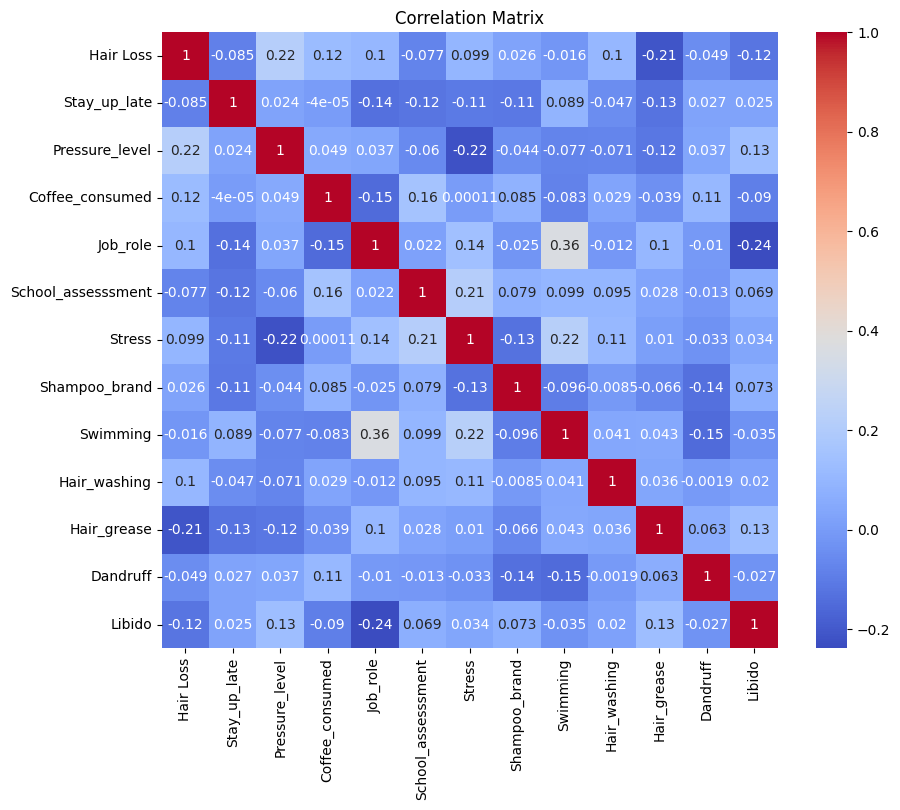

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 13)
df = pd.DataFrame(data, columns=['Hair Loss', 'Stay_up_late', 'Pressure_level', 'Coffee_consumed', 'Job_role','School_assesssment','Stress','Shampoo_brand','Swimming','Hair_washing','Hair_grease','Dandruff','Libido'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# **co relation =-hair gease ,hair wash ,libodo stress stay**

# **shap = hair gease hair washing  stress stay up late libido**

<Axes: xlabel='Hair Loss', ylabel='count'>

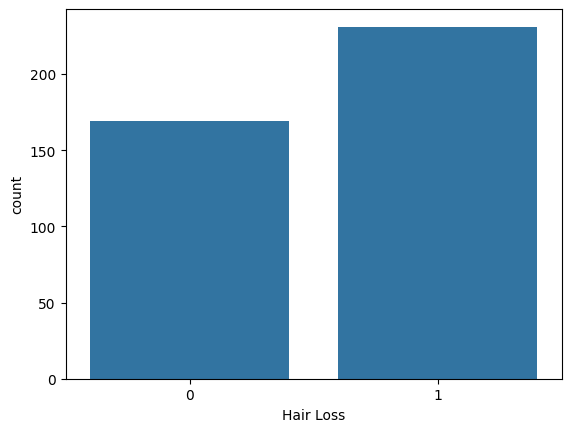

In [ ]:
sns.countplot(x="Hair Loss", data=Dataset)

In [ ]:
# X = Dataset[['Stay_up_late', 'Pressure_level', 'Coffee_consumed', 'Job_role','School_assesssment','Stress','Hair_washing','Hair_grease','Libido']]
X = Dataset[['Stay_up_late', 'Pressure_level', 'Job_role','Stress','Hair_washing','Hair_grease']]
Y = Dataset["Hair Loss"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.utils import shuffle
target_size = 10000
current_size = X_train.shape[0]
augmentation_factor = target_size // current_size

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

numeric_data_list = []
categorical_data_list = []

# Original Augmentation Loop
for i in range(augmentation_factor):
    noise = np.random.normal(0, 0.01, X_train[numeric_cols].shape)
    X_numeric_augmented = X_train[numeric_cols] + noise
    numeric_data_list.append(X_numeric_augmented)

    X_categorical_augmented = X_train[categorical_cols]
    categorical_data_list.append(X_categorical_augmented)

X_numeric_combined = pd.concat(numeric_data_list, axis=0).reset_index(drop=True)
X_categorical_combined = pd.concat(categorical_data_list, axis=0).reset_index(drop=True)

X_train_combined = pd.concat([X_numeric_combined, X_categorical_combined], axis=1)
Y_train_combined = pd.concat([pd.Series(Y_train)] * augmentation_factor, axis=0).reset_index(drop=True)

n_remaining = target_size - len(X_train_combined)
if n_remaining > 0:
    X_remaining_numeric = X_train[numeric_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_categorical = X_train[categorical_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_combined = pd.concat([X_remaining_numeric, X_remaining_categorical], axis=1)

    X_train_combined = pd.concat([X_train_combined, X_remaining_combined], axis=0).reset_index(drop=True)
    Y_remaining = pd.Series(Y_train).sample(n_remaining, replace=True).reset_index(drop=True)
    Y_train_combined = pd.concat([Y_train_combined, Y_remaining], axis=0).reset_index(drop=True)

# ============= New Code for Balancing =============

# Count the classes
class_counts = Y_train_combined.value_counts()
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()

# Separate classes
X_minority = X_train_combined[Y_train_combined == min_class]
X_majority = X_train_combined[Y_train_combined == max_class]

Y_minority = Y_train_combined[Y_train_combined == min_class]
Y_majority = Y_train_combined[Y_train_combined == max_class]

# Calculate difference to balance
difference = len(Y_majority) - len(Y_minority)

# Augment minority class to balance
X_minority_augmented = X_minority.sample(difference, replace=True).reset_index(drop=True)
Y_minority_augmented = pd.Series([min_class] * difference)

# Combine balanced dataset
X_train_balanced = pd.concat([X_majority, X_minority, X_minority_augmented], axis=0).reset_index(drop=True)
Y_train_balanced = pd.concat([Y_majority, Y_minority, Y_minority_augmented], axis=0).reset_index(drop=True)

# Shuffle the combined dataset
X_train_balanced, Y_train_balanced = shuffle(X_train_balanced, Y_train_balanced, random_state=42)

print("Balanced Class Distribution:")
print(Y_train_balanced.value_counts())

# Now train the model on X_train_balanced, Y_train_balanced

Balanced Class Distribution:
1    6186
0    6186
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print("Class Distribution After Augmentation:")
print(Y_train_combined.value_counts())

Class Distribution After Augmentation:
Hair Loss
1    6186
0    3814
Name: count, dtype: int64


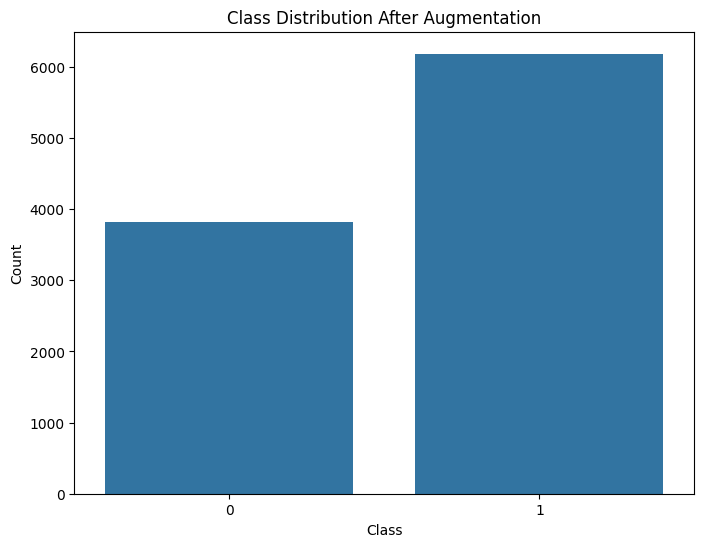

In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=Y_train_combined)
plt.title("Class Distribution After Augmentation")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

<ipython-input-44-bc0ece51deae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='viridis')


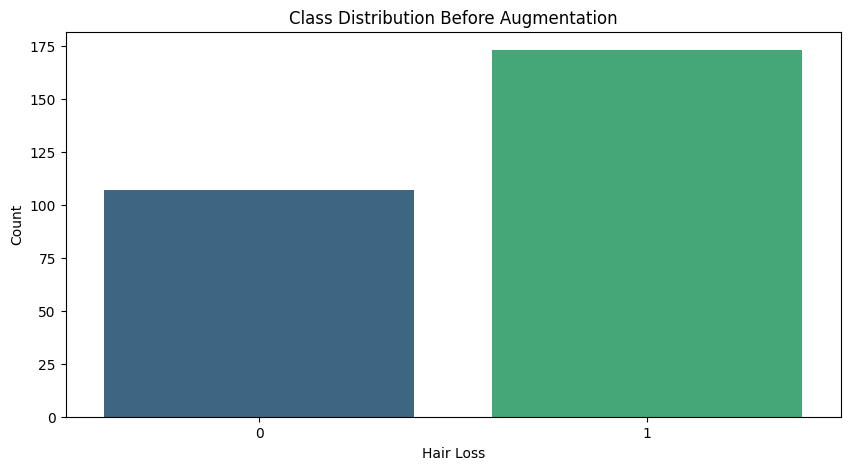

<ipython-input-44-bc0ece51deae>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train_combined, palette='viridis')


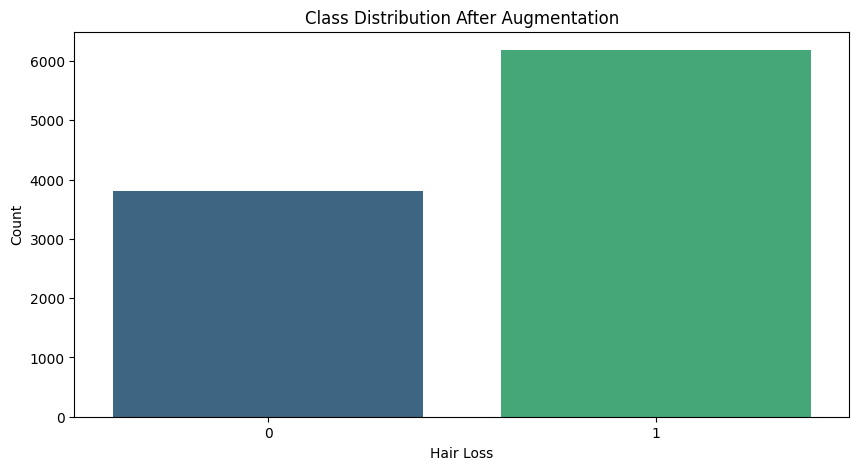

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Class Distribution Before Augmentation
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution Before Augmentation')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

# Plot Class Distribution After Augmentation
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train_combined, palette='viridis')
plt.title('Class Distribution After Augmentation')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

<ipython-input-45-2dbf1bf70b2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='viridis')


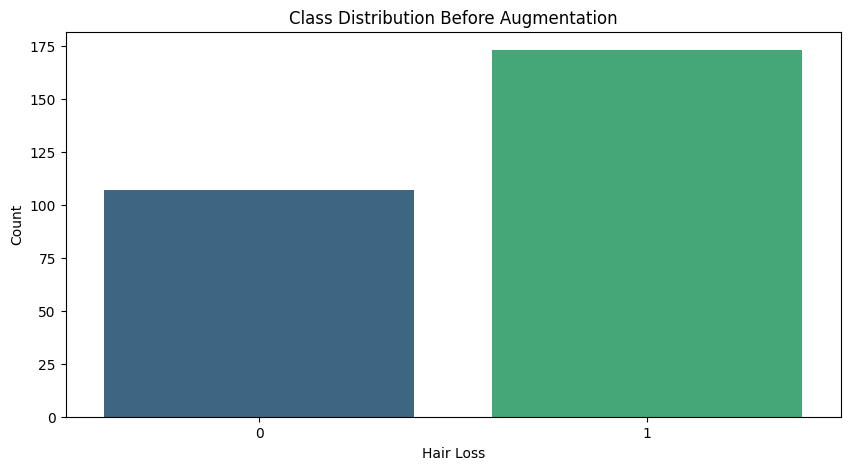

<ipython-input-45-2dbf1bf70b2b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train_balanced, palette='viridis')


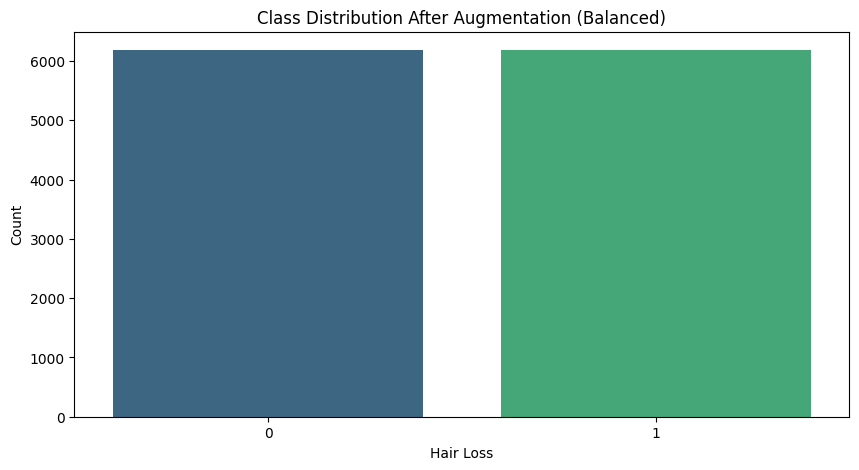

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Before Augmentation
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution Before Augmentation')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

# Plot After Augmentation (Balanced)
plt.figure(figsize=(10, 5))
sns.countplot(x=Y_train_balanced, palette='viridis')
plt.title('Class Distribution After Augmentation (Balanced)')
plt.xlabel('Hair Loss')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Before Augmentation (Training):")
print(Y_train.value_counts(normalize=True) * 100)

print("\nAfter Augmentation (Training):")
print(Y_train_balanced.value_counts(normalize=True) * 100)

print("\nActual Test:")
print(Y_test.value_counts(normalize=True) * 100)

Before Augmentation (Training):
Hair Loss
1    61.785714
0    38.214286
Name: proportion, dtype: float64

After Augmentation (Training):
1    50.0
0    50.0
Name: proportion, dtype: float64

Actual Test:
Hair Loss
0    51.666667
1    48.333333
Name: proportion, dtype: float64


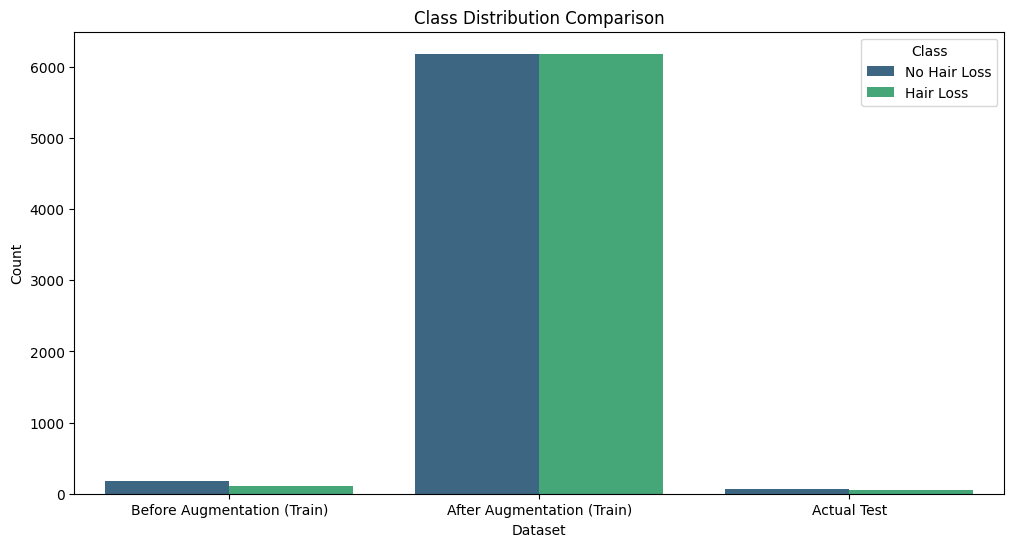

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Class': ['No Hair Loss', 'Hair Loss'],
    'Before Augmentation (Train)': Y_train.value_counts().values,
    'After Augmentation (Train)': Y_train_balanced.value_counts().values,
    'Actual Test': Y_test.value_counts().values
})

# Melt DataFrame for Seaborn compatibility
plot_data_melted = plot_data.melt(id_vars='Class', var_name='Dataset', value_name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data_melted, x='Dataset', y='Count', hue='Class', palette='viridis')
plt.title('Class Distribution Comparison')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

In [ ]:
Dataset.drop(columns=['date'], axis=1, inplace=True)

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Hair Loss           400 non-null    int64
 1   Stay_up_late        400 non-null    int64
 2   Pressure_level      400 non-null    int64
 3   Coffee_consumed     400 non-null    int64
 4   Job_role            400 non-null    int64
 5   School_assesssment  400 non-null    int64
 6   Stress              400 non-null    int64
 7   Shampoo_brand       400 non-null    int64
 8   Swimming            400 non-null    int64
 9   Hair_washing        400 non-null    int64
 10  Hair_grease         400 non-null    int64
 11  Dandruff            400 non-null    int64
 12  Libido              400 non-null    int64
dtypes: int64(13)
memory usage: 40.8 KB


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)

# **LOG REG**

In [ ]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, Y_train_balanced)  # Train the model

# Predictions on training data
X_train_prediction_log_reg = log_reg.predict(X_train_scaled)
train_accuracy_log_reg = accuracy_score(Y_train_balanced, X_train_prediction_log_reg)
print("Training data accuracy of Logistic Regression: ", train_accuracy_log_reg)

# Predictions on test data
X_test_prediction_log_reg = log_reg.predict(X_test_scaled)
test_accuracy_log_reg = accuracy_score(Y_test, X_test_prediction_log_reg)
print("Testing data accuracy of Logistic Regression: ", test_accuracy_log_reg)

Training data accuracy of Logistic Regression:  0.7655997413514387
Testing data accuracy of Logistic Regression:  0.7916666666666666


# **NBYS**

In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_nbayes=nbayes.predict(X_train_scaled)
train_accuracy_nbayes=accuracy_score(Y_train_balanced,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

X_test_prediction_nbayes=nbayes.predict(X_test_scaled)
test_accuracy_nbayes=accuracy_score(Y_test,X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ",test_accuracy_nbayes)


Training data accuracy of nbayes:  0.7007759456838021
Testing data accuracy of nbayes:  0.7083333333333334


# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_knn=knn.predict(X_train_scaled)
train_accuracy_knn=accuracy_score(Y_train_balanced,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

X_test_prediction_knn=knn.predict(X_test_scaled)
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Training data accuracy of knn:  0.8157937277723892
Testing data accuracy of knn:  0.275


# **DT**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_dt_classifier=dt_classifier.predict(X_train_scaled)
train_accuracy_dt_classifier=accuracy_score(Y_train_balanced,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

X_test_prediction_dt_classifier=dt_classifier.predict(X_test_scaled)
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)


Training data accuracy of dt_classifier:  0.9924021985127708
Testing data accuracy of dt_classifier:  0.325


# **RF**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train_balanced,X_train_prediction_random_forest)
print("Training data accuracy of random_forest: ",train_accuracy_random_forest)
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)
test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)


Training data accuracy of random_forest:  0.9924021985127708
Testing data accuracy of random_forest:  0.30833333333333335


# **XGB**

In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train_balanced,X_train_prediction_xgb)
print("Training data accuracy of xgb: ",train_accuracy_xgb)
X_test_prediction_xgb=xgb.predict(X_test_scaled)
test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)

Training data accuracy of xgb:  0.923052053022955
Testing data accuracy of xgb:  0.36666666666666664


In [ ]:
svc = SVC()
svc.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_svc=svc.predict(X_train_scaled)
train_accuracy_svc=accuracy_score(Y_train_balanced,X_train_prediction_svc)
print("Training data accuracy of xgb: ",train_accuracy_svc)

X_test_prediction_svc=svc.predict(X_test_scaled)
test_accuracy_svc=accuracy_score(Y_test,X_test_prediction_svc)
print("Testing data accuracy of svc: ",test_accuracy_svc)

Training data accuracy of xgb:  0.8046395085677336
Testing data accuracy of svc:  0.7833333333333333


In [ ]:
#predictions_xgb = xgb.predict(X_test_scaled)
predictions_svc =svc.predict(X_test_scaled)
predictions_log_reg = log_reg.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_nb = nbayes.predict(X_test_scaled)
predictions_dt = dt_classifier.predict(X_test_scaled)
predictions_xgb = xgb.predict(X_test_scaled)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier =  Xgb.XGBClassifier()  # You can choose any classifier as the meta-classifier

# meta_classifier =  svc  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.85


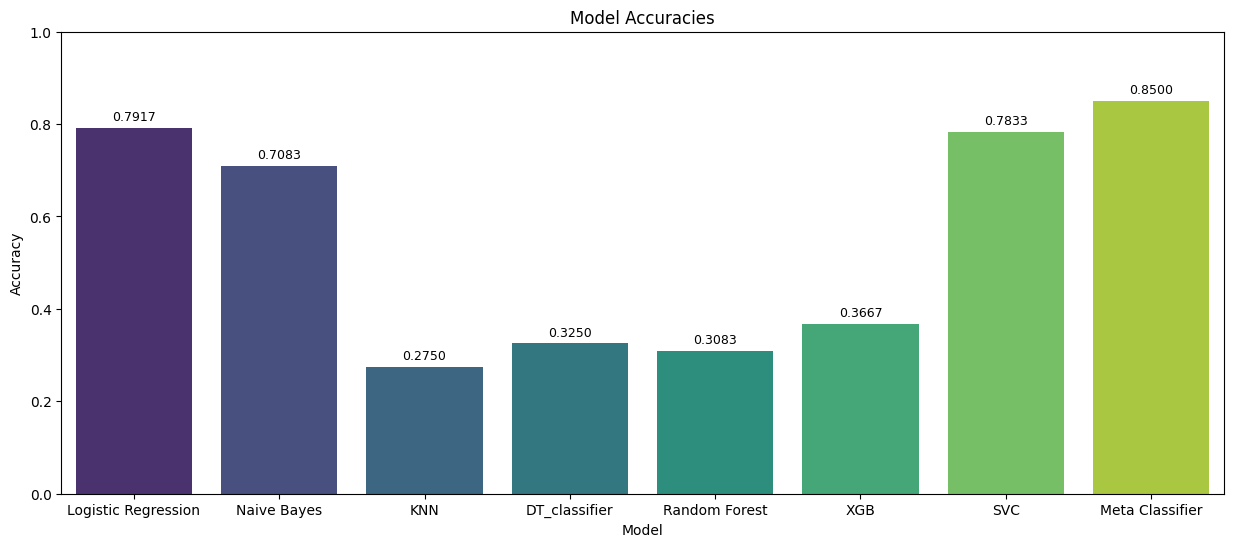

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

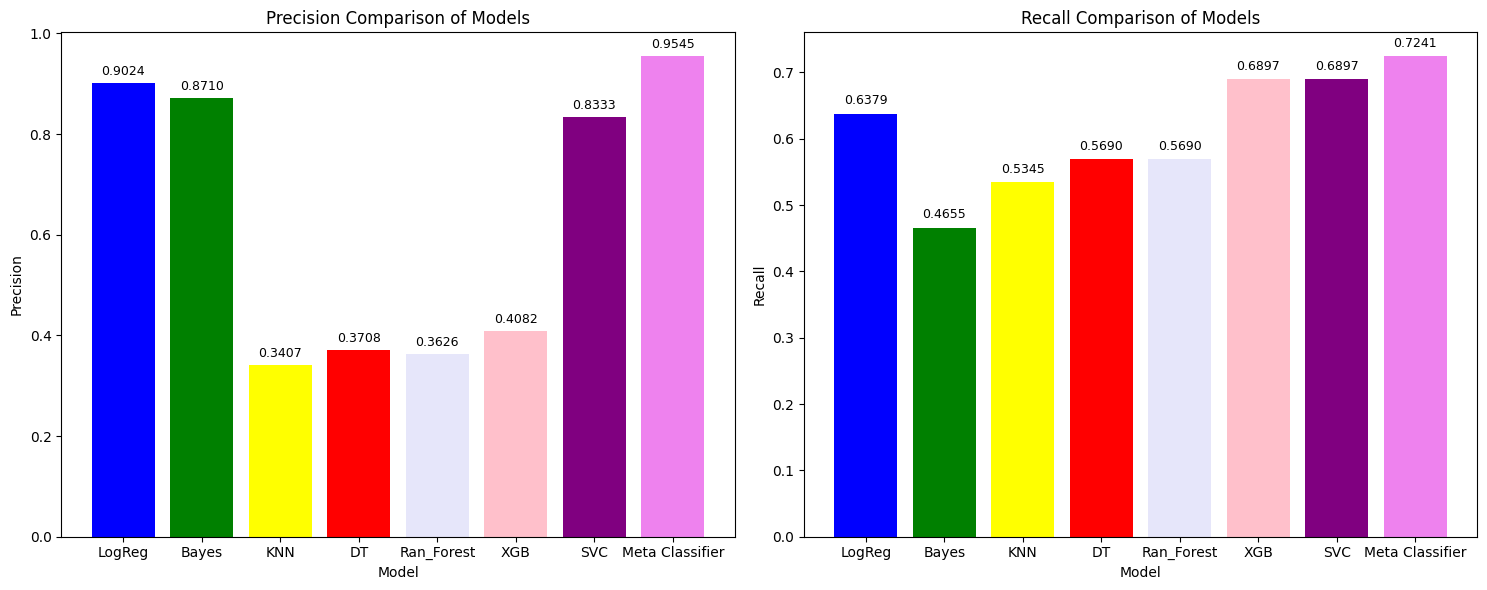

In [ ]:
# Calculate precision and recall for each model
precisions = [precision_score(Y_test,X_test_prediction_log_reg), precision_score(Y_test, X_test_prediction_nbayes),  precision_score(Y_test, X_test_prediction_knn),precision_score(Y_test, X_test_prediction_dt_classifier),precision_score(Y_test,X_test_prediction_random_forest),precision_score(Y_test,X_test_prediction_xgb),precision_score(Y_test,X_test_prediction_svc),precision_score(target, y_pred_meta)]
recalls = [recall_score(Y_test, X_test_prediction_log_reg), recall_score(Y_test, X_test_prediction_nbayes),  recall_score(Y_test, X_test_prediction_knn),recall_score(Y_test, X_test_prediction_dt_classifier),recall_score(Y_test,X_test_prediction_random_forest),recall_score(Y_test,X_test_prediction_xgb),recall_score(Y_test,X_test_prediction_svc),recall_score(target, y_pred_meta)]

# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate F1-score for each model
f1_scores = [f1_score(Y_test, X_test_prediction_log_reg),
             f1_score(Y_test, X_test_prediction_nbayes),
             f1_score(Y_test, X_test_prediction_knn),
             f1_score(Y_test, X_test_prediction_dt_classifier),
             f1_score(Y_test, X_test_prediction_random_forest),
             f1_score(Y_test,X_test_prediction_xgb),
             f1_score(Y_test,X_test_prediction_svc),
             f1_score(target, y_pred_meta),]


# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")

LogReg: F1-score = 0.7475
Bayes: F1-score = 0.6067
KNN: F1-score = 0.4161
DT: F1-score = 0.4490
Ran_Forest: F1-score = 0.4430
XGB: F1-score = 0.5128
SVC: F1-score = 0.7547
Meta Classifier: F1-score = 0.8235


<ipython-input-83-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


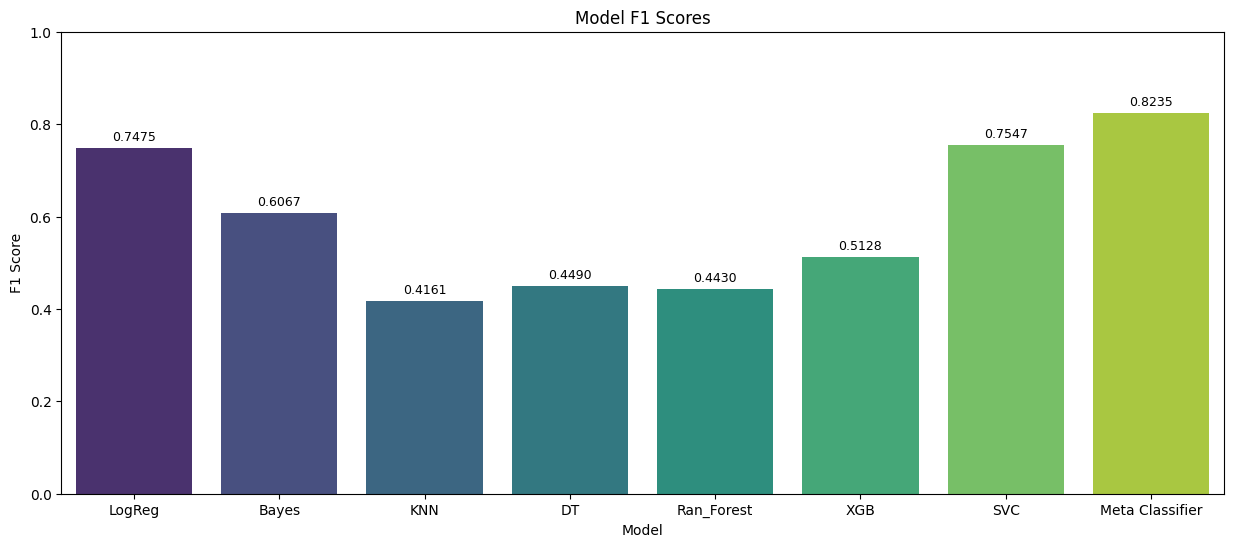

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

# Load your actual dataset (replace with your actual dataset file)
# data = pd.read_csv('/content/Dataset_1.csv')
X = Dataset.drop('Hair Loss', axis=1)  # Exclude the target column
Y = Dataset['Hair Loss']

# Train your model (assuming you have already trained it)
model = meta_classifier  # Replace with your actual model
model.fit(X, Y)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=['No Hair fall', 'Hair Fall'],  # Replace with your actual class names
    mode='classification'  # Change to 'regression' if your task is regression
)

# Select an instance for explanation (replace with your actual instance)
instance = X.iloc[0]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance.values,
    predict_fn=model.predict_proba  # Use predict if your task is regression
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True)

Shape of X: (400, 12)
Shape of instance: (1, 12)


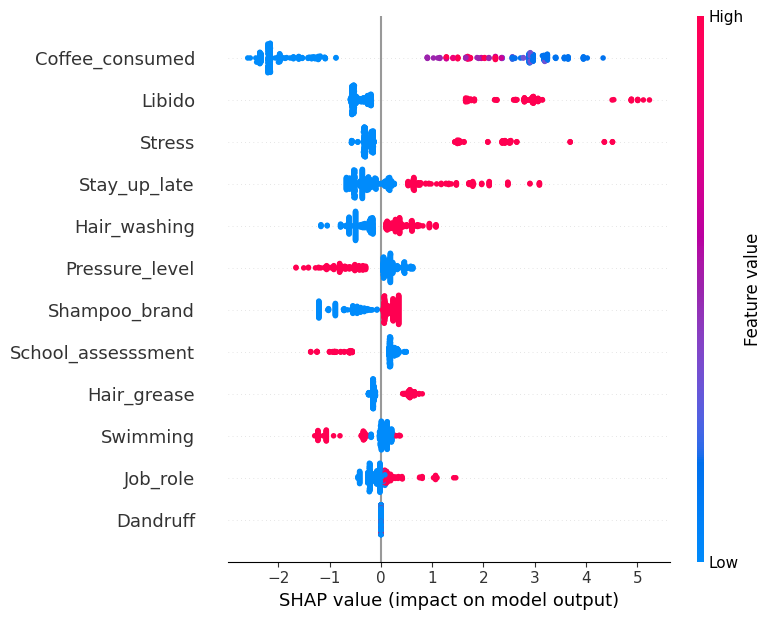

In [ ]:
# Load your actual dataset (replace with your actual dataset file)
#data = pd.read_csv('/content/Dataset_1.csv')
X = Dataset.drop('Hair Loss', axis=1)  # Exclude the target column
Y = Dataset['Hair Loss']


# Train your model (assuming you have already trained it)
model = meta_classifier  # Replace with your actual model
model.fit(X, Y)

# Check the shapes of the data
print("Shape of X:", X.shape)

# Select an instance for explanation (replace with your actual instance)
instance = X.iloc[0].values.reshape(1, -1)
print("Shape of instance:", instance.shape)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the selected instance
shap_values = explainer.shap_values(X)

# Visualize the SHAP values
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, instance)

# For a more comprehensive analysis, you can also visualize feature importance across the entire dataset
shap.summary_plot(shap_values, X)

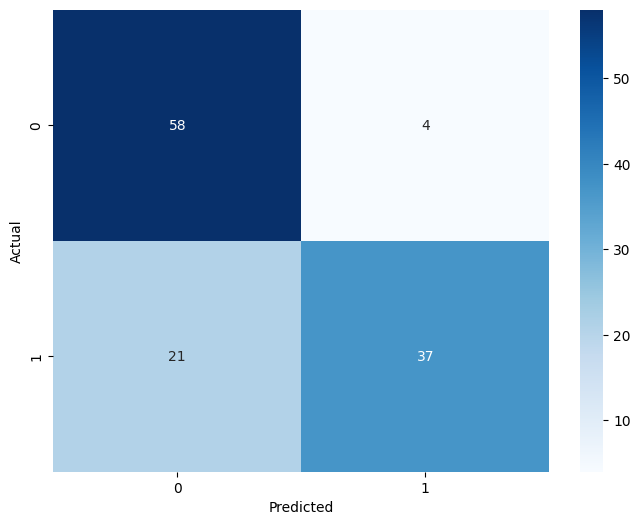

In [ ]:
cm_lr = confusion_matrix(Y_test, X_test_prediction_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

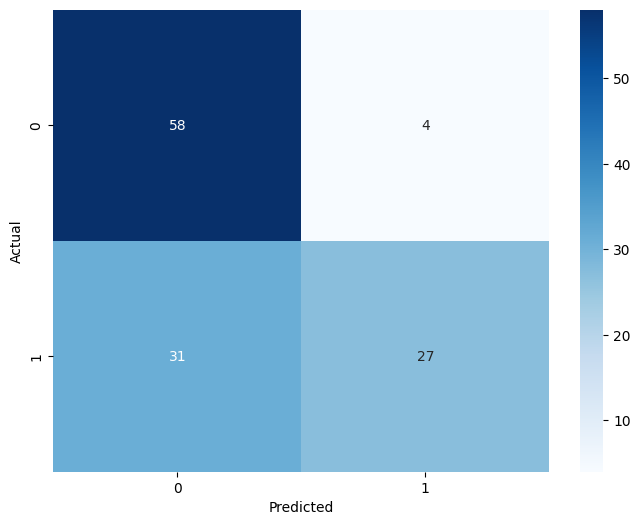

In [ ]:
cm_nb = confusion_matrix(Y_test,X_test_prediction_nbayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

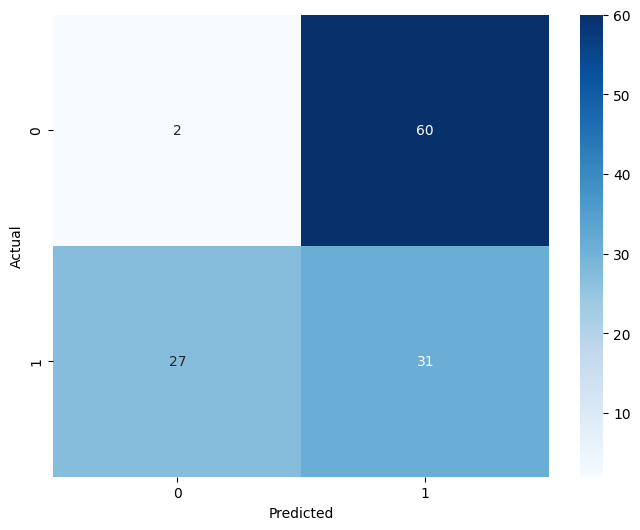

In [ ]:
cm_knn = confusion_matrix(Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

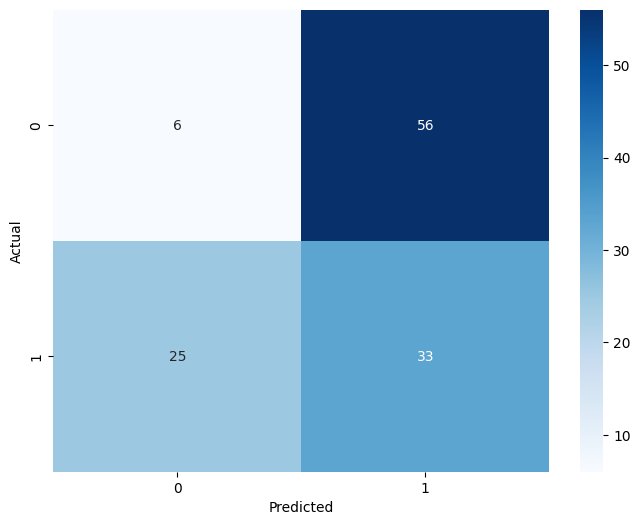

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_classifier, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

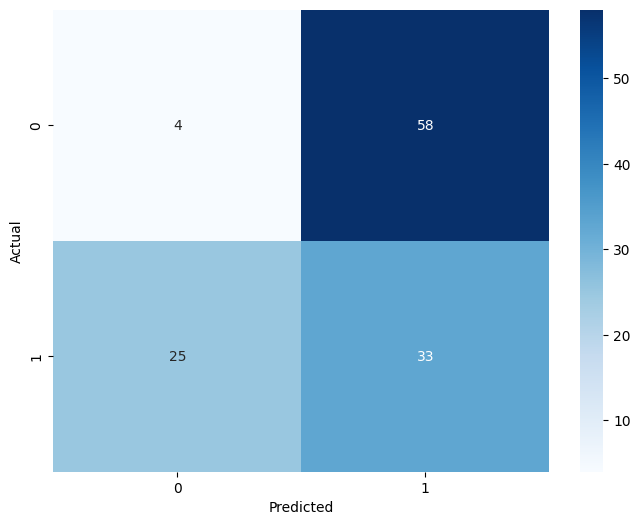

In [ ]:
cm_random = confusion_matrix(Y_test,X_test_prediction_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random , annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

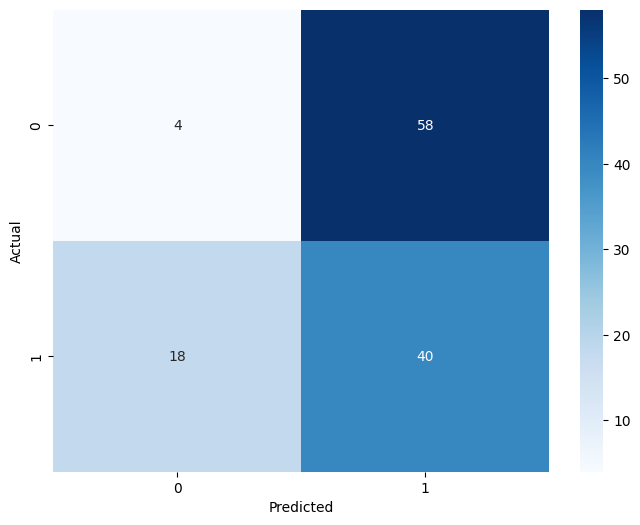

In [ ]:
cm_xgb = confusion_matrix(Y_test,X_test_prediction_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

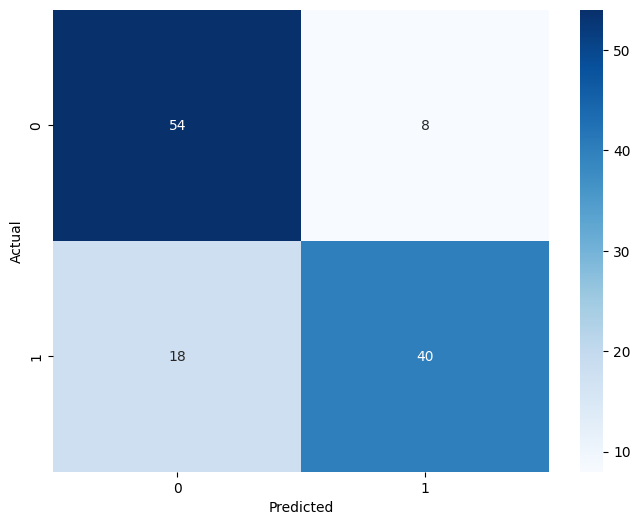

In [ ]:
cm_svc = confusion_matrix(Y_test,X_test_prediction_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

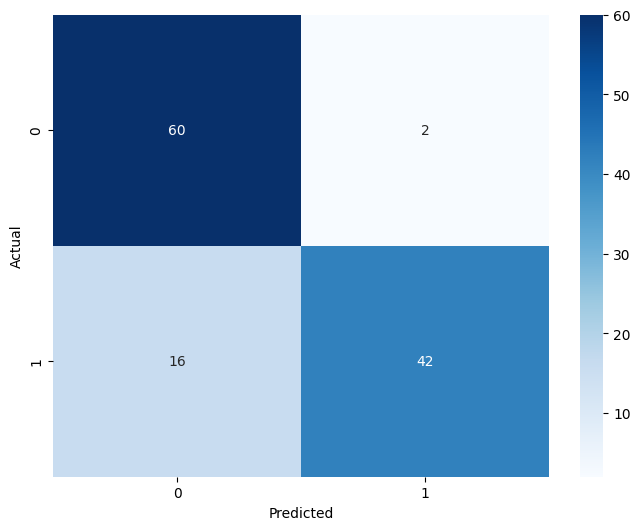

In [ ]:
cm_meta = confusion_matrix(target, y_pred_meta)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Meta Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

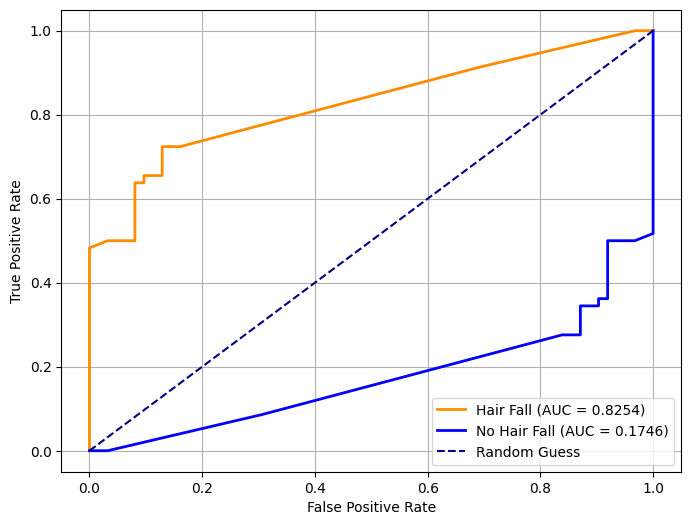

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


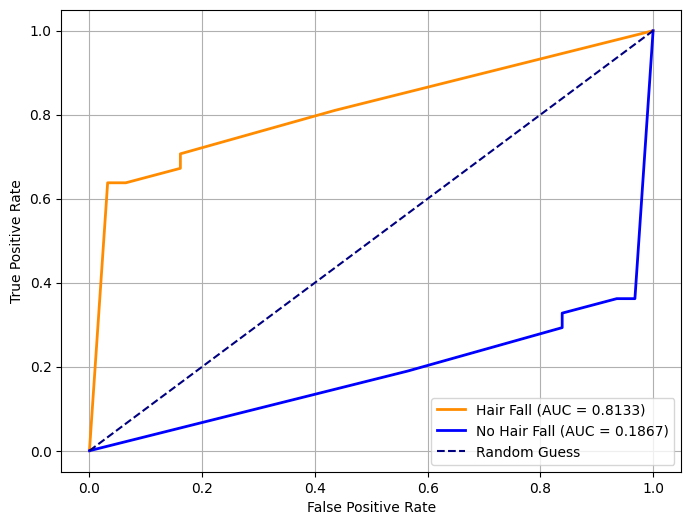

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


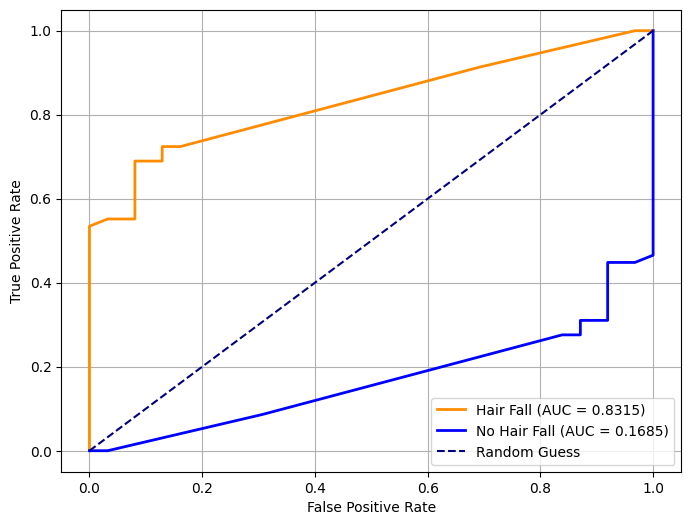

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


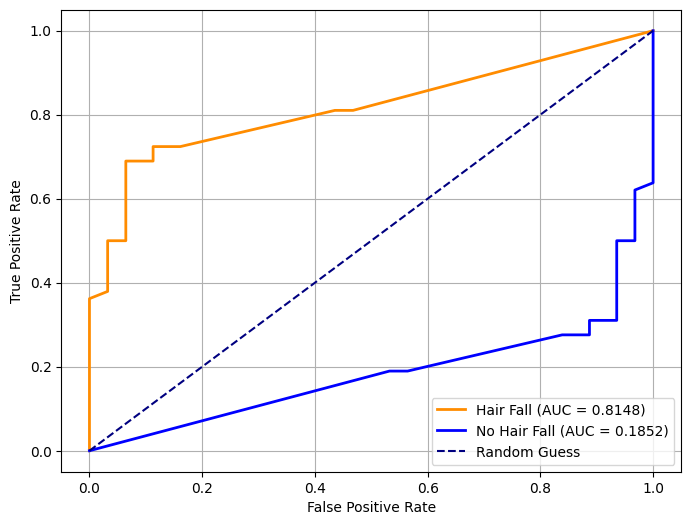

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =LogisticRegression()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


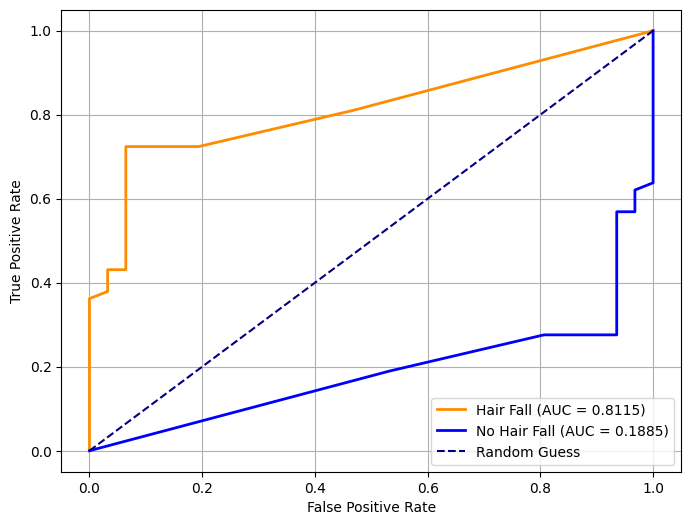

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =GaussianNB()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


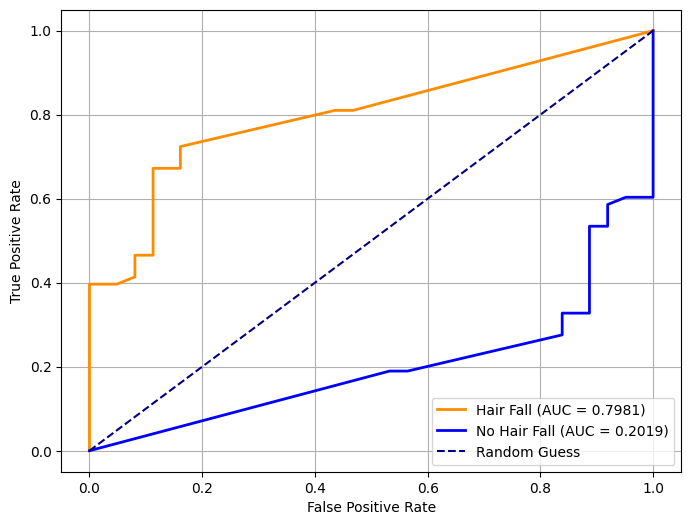

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = SVC(probability=True)
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


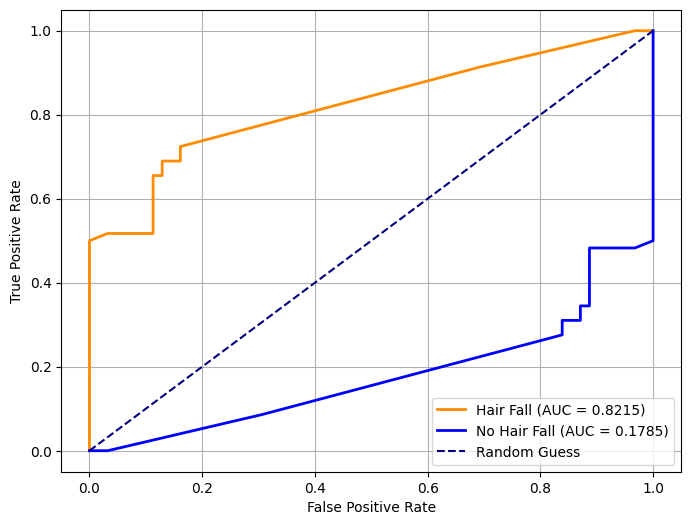

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =Xgb.XGBClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


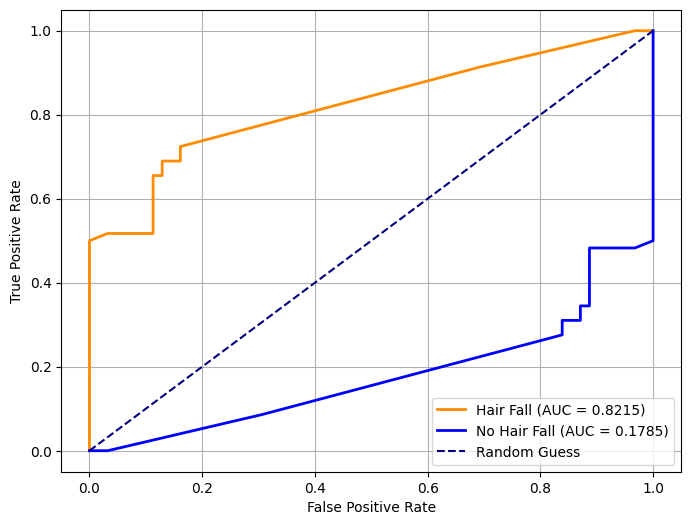

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =meta_classifier
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
csv_file_path = 'new_dataset_3.2.csv'
Dataset.to_csv(csv_file_path, index=False)

In [ ]:
Dataset_3=pd.read_csv('/content/new_dataset_3.2.csv')
Dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Hair Loss           400 non-null    int64
 1   Stay_up_late        400 non-null    int64
 2   Pressure_level      400 non-null    int64
 3   Coffee_consumed     400 non-null    int64
 4   Job_role            400 non-null    int64
 5   School_assesssment  400 non-null    int64
 6   Stress              400 non-null    int64
 7   Shampoo_brand       400 non-null    int64
 8   Swimming            400 non-null    int64
 9   Hair_washing        400 non-null    int64
 10  Hair_grease         400 non-null    int64
 11  Dandruff            400 non-null    int64
 12  Libido              400 non-null    int64
dtypes: int64(13)
memory usage: 40.8 KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
dataset_2 = pd.read_csv('/content/Imputed Dataset_2_from_Dataset_1.csv')

# Define feature mapping between Dataset 1 and Dataset 2
feature_mapping = {
    "Stress": "Stress",
    "Hair Loss": "Hair Loss",  # Assuming 'Hair Loss' is the target in both datasets
    "Job_role": "Job_role",
    "Shampoo_brand": "Shampoo_brand",
    "School_assesssment":"Education",
}

# Align features for Dataset 1 & Dataset 2
mapped_features = [key for key in feature_mapping if key in dataset_2.columns]
X_dataset_1 = Dataset[mapped_features]
y_dataset_1 = Dataset[['Hair_washing', 'Libido', 'Hair_grease','Stay_up_late']]

# 1. Split Dataset 1 into train and test sets
X_train_dataset_1, X_test_dataset_1, y_train_dataset_1, y_test_dataset_1 = train_test_split(
    X_dataset_1, y_dataset_1, test_size=0.3, random_state=42
)

# 2. Train the first model (RandomForestClassifier) using training data from Dataset 1
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_dataset_1, (y_train_dataset_1 > 0).astype(int))

# 3. Train the second model (KNeighborsClassifier) using training data from Dataset 1
imputation_model_test = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with desired parameters
imputation_model_test.fit(X_train_dataset_1, (y_train_dataset_1 > 0).astype(int))  # Use binary target for KNN

# 4. Align features for Dataset 2
X_dataset_2 = dataset_2[mapped_features]

# 5. Split Dataset 2 using the same indices as Dataset 1's test set
test_indices_dataset_1 = X_test_dataset_1.index
X_test_dataset_2 = X_dataset_2.loc[test_indices_dataset_1]
X_train_dataset_2 = X_dataset_2.drop(test_indices_dataset_1)

# 6. Impute values for the training data in dataset_2 using the first model
dataset_2_train = dataset_2.loc[X_train_dataset_2.index]
dataset_2_train.loc[:, ['Hair_washing', 'Libido', 'Hair_grease','Stay_up_late']] = classifier.predict(X_train_dataset_2)

# 7. Impute values for the test data in dataset_2 using the second model (KNN)
dataset_2_test = dataset_2.loc[X_test_dataset_2.index]
imputed_test_values = imputation_model_test.predict(X_test_dataset_2)  # Use KNN for test imputation
dataset_2_test.loc[:, ['Hair_washing', 'Libido', 'Hair_grease','Stay_up_late']] = imputed_test_values

# 8. Concatenate and save:
final_dataset_2 = pd.concat([dataset_2_train, dataset_2_test], ignore_index=True)
final_dataset_2.to_csv('/content/Imputed Dataset_2_from_Dataset_1.csv', index=False)

print("Imputation completed for Dataset 2.")





FileNotFoundError: [Errno 2] No such file or directory: '/content/Imputed Dataset_2_from_Dataset_1.csv'

In [ ]:
mse_values = {}
columns = ['Hair_washing', 'Libido', 'Hair_grease','Stay_up_late'] # Define columns here for clarity
for column in columns:
    y_test_actual = y_test_dataset_1[column].values
    y_test_imputed = final_dataset_2.loc[test_indices_dataset_1, column].values
    mse_values[column] = mean_squared_error(y_test_actual, y_test_imputed) # Calculate and store MSE
    print(f"Mean Squared Error for '{column}': {mse_values[column]:.4f}")

# Extract MSE values into a list
mse_values_list = [mse_values[col] for col in columns]  # Get MSE values for each column

# Create Bar Plot
bar_width = 0.35
index = np.arange(len(columns))

plt.figure(figsize=(10, 6))
plt.bar(index, mse_values_list, bar_width, label='Imputed MSE', color='skyblue') # Use the created list here

plt.xlabel('Imputed Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(index, columns)
plt.legend()
plt.tight_layout()
plt.show()